In [40]:
import pandas as pd
import numpy as np


In [ ]:
##Exploring Immigration to canada dataset

In [41]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [42]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [54]:
df_can=pd.read_excel("C:/Users/RGRK/OneDrive/Desktop/Work/BA/Data Analysis and Visualization with Python/DataViz Exercise files/CanadaImigrants.xlsx",
                    sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

In [57]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_can.shape

(195, 51)

In [59]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1, inplace=True)  ##Cleaning up data that is not informative

In [60]:
df_can.columns

Index([     'OdName',    'AreaName',     'RegName',     'DevName',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [61]:
df_can.shape

(195, 46)

In [66]:
df_can.rename({'OdName':'Country','AreaName':'Continent','RegName':'Region'}, axis=1, inplace=True) # Renaming as perc convinience

In [67]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_can.columns

Index([    'Country',   'Continent',      'Region',     'DevName',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [69]:
df_can.columns=list(map(str,df_can.columns)) #converting columns headers to stings

In [70]:
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [72]:
all(isinstance(column, int) for column in df_can.columns) # Examining type of columns  

False

In [73]:
all(isinstance(column, str) for column in df_can.columns)

True

In [80]:
df_can.set_index('Country', inplace=True)   #set index as country

In [82]:
years = list(map(str, range(1980,2014)))  # set years as strings in years variable

In [83]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_can['Total']=df_can.sum(axis=1)

In [88]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [89]:
df_can.shape

(195, 46)

In [91]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Total'],
      dtype='object')

In [97]:
df_can.drop({'Unnamed: 43','Unnamed: 44','Unnamed: 45'}, axis=1,inplace=True)

In [98]:
df_can.shape

(195, 38)

In [99]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [ ]:
### Visualizing Data using MatplotLib

In [100]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [101]:
mpl.__version__

'3.3.4'

In [102]:
###AREA PLOTS

In [106]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [109]:
df_top5=df_can.head()

In [111]:
df_top5[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [112]:
df_top5=df_top5[years].transpose()

In [113]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [114]:
df_top5.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [116]:
df_top5.index=df_top5.index.map(int)

In [117]:
df_top5.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

<AxesSubplot:>

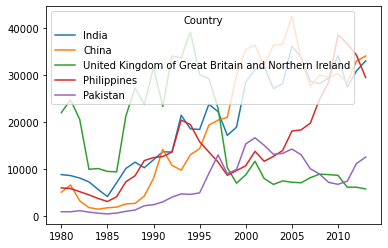

In [118]:
df_top5.plot()

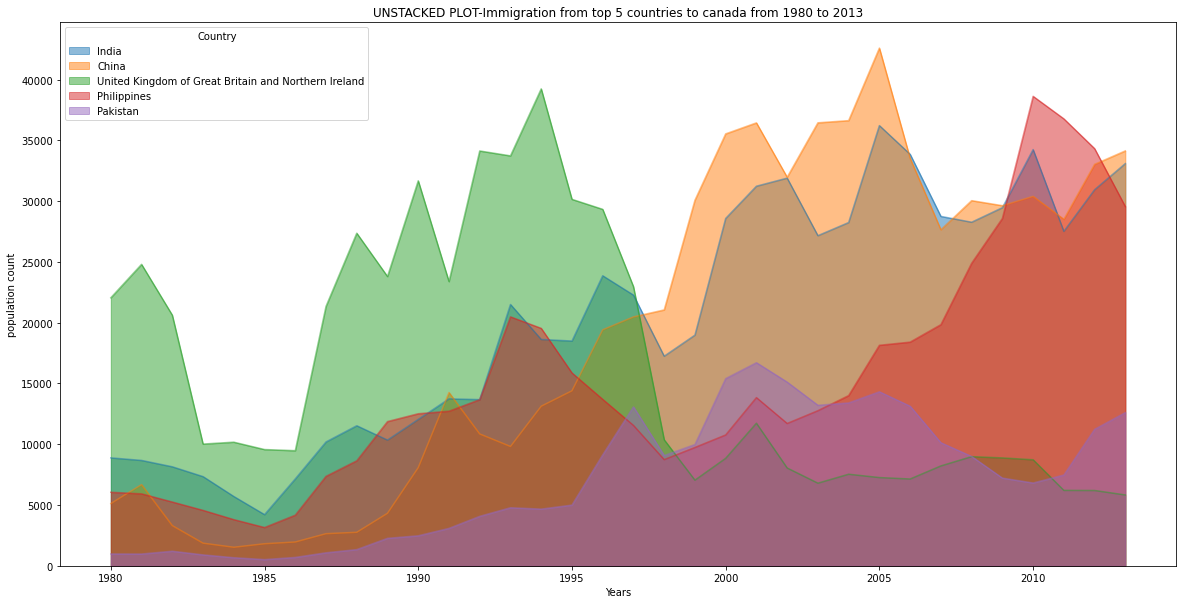

In [129]:
df_top5.plot(kind='area', stacked=False,figsize=(20,10))
plt.title('UNSTACKED PLOT-Immigration from top 5 countries to canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('population count')
plt.show()           #Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass stacked=False.

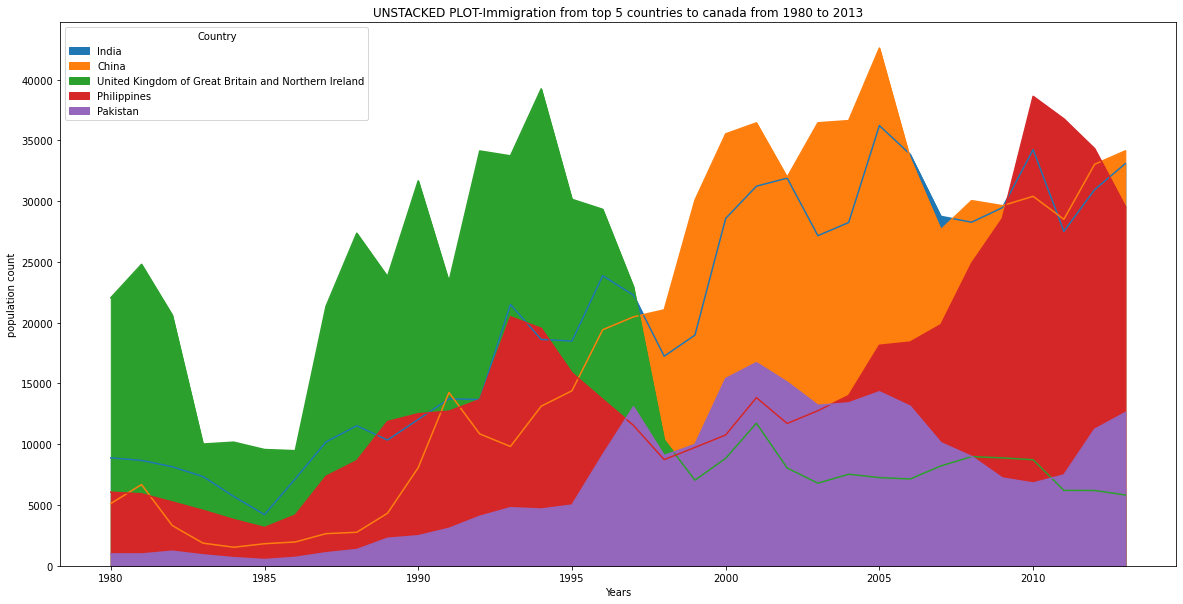

In [132]:
df_top5.plot(kind='area', stacked=False,figsize=(20,10), alpha=1)  #, # 0-1, default value a= 0.5
plt.title('UNSTACKED PLOT-Immigration from top 5 countries to canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('population count')
plt.show()   

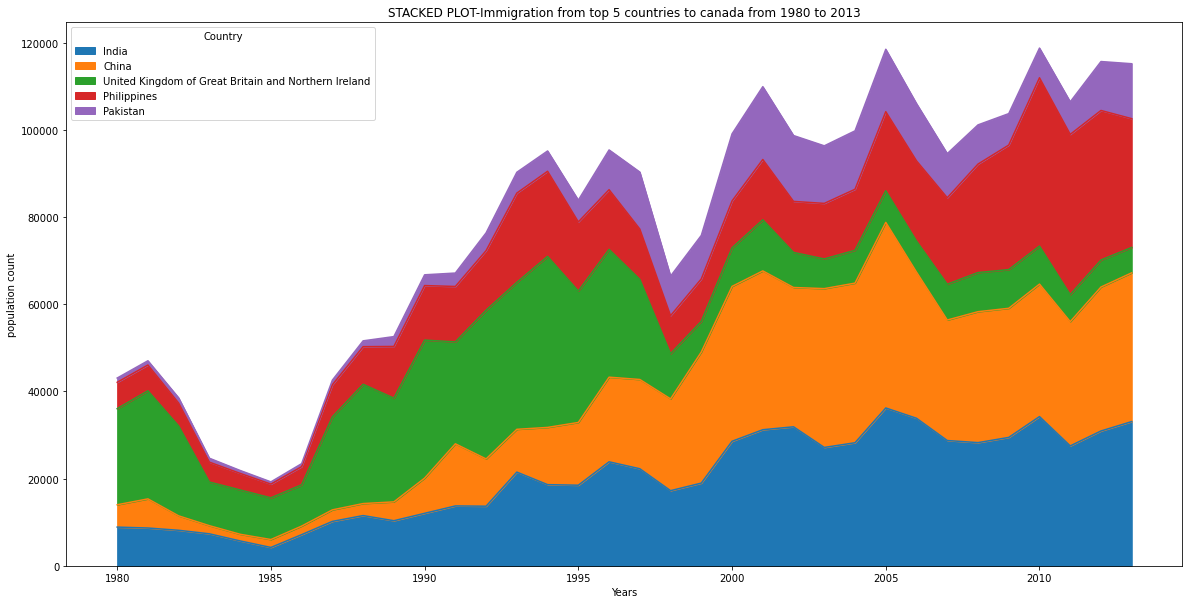

In [128]:
df_top5.plot(kind='area',figsize=(20,10))
plt.title('STACKED PLOT-Immigration from top 5 countries to canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('population count')
plt.show()

In [133]:
##Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

In [135]:
df_can.sort_values(['Total'])

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.0
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2.0
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5.0
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500.0


In [136]:
df_least5=df_can.sort_values(['Total']).head(5)

In [137]:
df_least5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.0
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2.0
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5.0
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5.0


In [140]:
df_least5=df_least5[years].transpose()

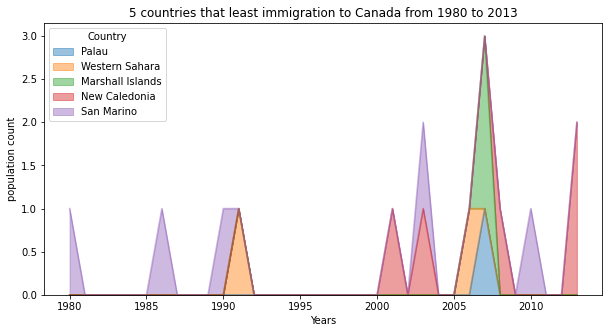

In [146]:
df_least5.plot(kind='area', figsize=(10,5),alpha=0.45)
plt.title('5 countries that least immigration to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('population count')
plt.show()

In [149]:
df_least5.index=df_least5.index.map(int)

In [151]:
df_least5.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

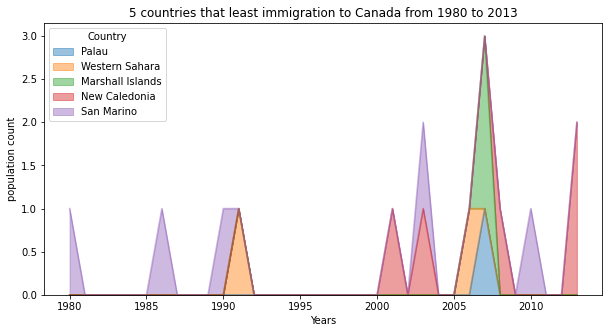

In [152]:
df_least5.plot(kind='area', figsize=(10,5),alpha=0.45)
plt.title('5 countries that least immigration to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('population count')
plt.show()

Text(0, 0.5, 'population count')

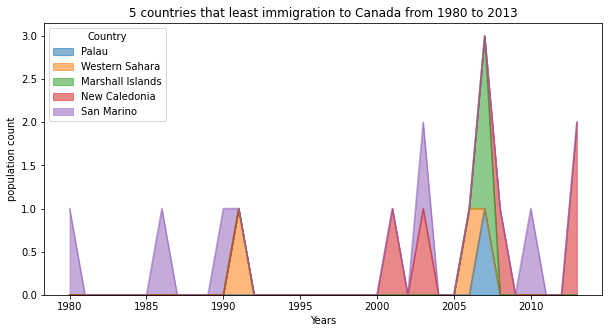

In [154]:
ax=df_least5.plot(kind='area', figsize=(10,5),alpha=0.55)
ax.set_title('5 countries that least immigration to Canada from 1980 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('population count')

In [155]:
##HISTOGRAMS
#Question: What is the frequency distribution of the number (population) of new 
#immigrants from the various countries to Canada in 2013?

In [159]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904.0
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600.0


In [160]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [166]:
count, bin_edges=np.histogram(df_can['2013'])

In [167]:
count   #frequency count

array([178,  11,   1,   2,   0,   0,   0,   0,   1,   2], dtype=int64)

In [168]:
bin_edges # bin ranges bin ranges, default = 10 bins

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])

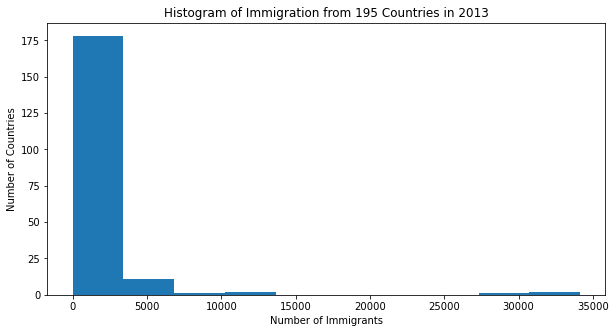

In [173]:
df_can['2013'].plot(kind='hist', figsize=(10,5))
plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [174]:
#We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

#Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [180]:
df_can.loc[['Denmark','Norway','Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [190]:
df_dns=df_can.loc[['Denmark','Norway','Sweden'], years].transpose()
df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


<AxesSubplot:ylabel='Frequency'>

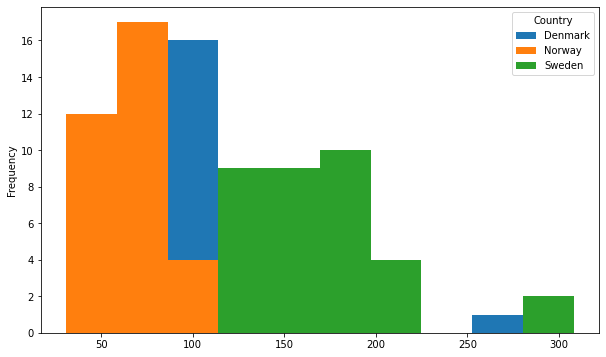

In [192]:
df_dns.plot(kind='hist',figsize=(10, 6))

In [219]:
count, bin_ranges= np.histogram(df_dns, 20)

In [220]:
count

array([ 3,  9,  9, 18, 11,  9,  3, 10,  2,  8,  6,  5,  3,  1,  0,  0,  0,
        1,  2,  2], dtype=int64)

In [221]:
bin_ranges

array([ 31.  ,  44.85,  58.7 ,  72.55,  86.4 , 100.25, 114.1 , 127.95,
       141.8 , 155.65, 169.5 , 183.35, 197.2 , 211.05, 224.9 , 238.75,
       252.6 , 266.45, 280.3 , 294.15, 308.  ])

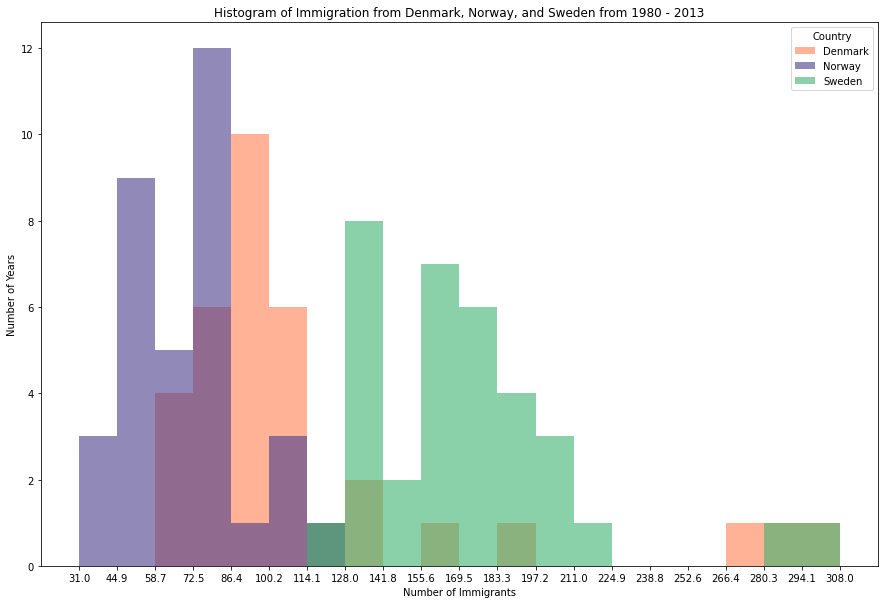

In [203]:
df_dns.plot(kind='hist', figsize=(15,10), alpha=0.6, color=['coral', 'darkslateblue', 'mediumseagreen'],bins=20, xticks=bin_ranges)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

In [204]:
import matplotlib    # full list of colours inmatplotlib library
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


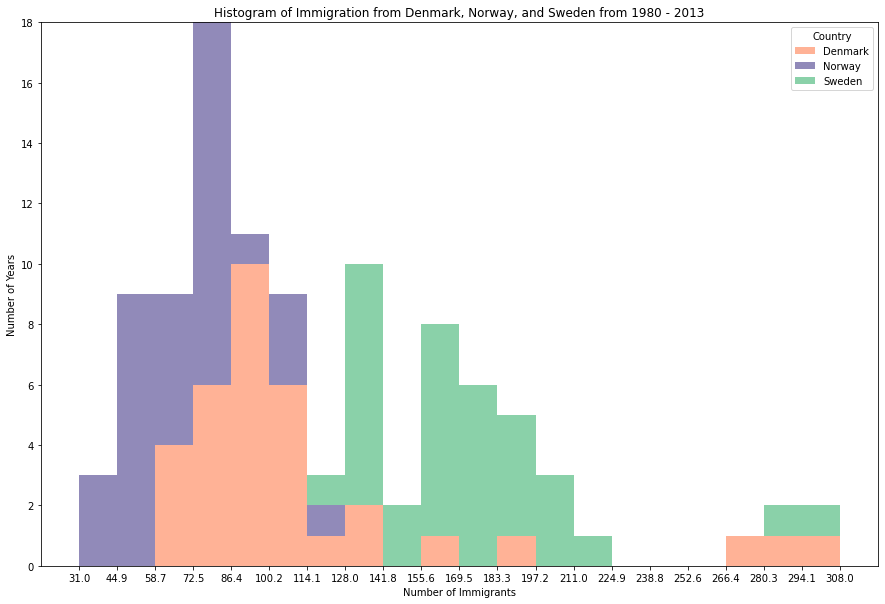

In [205]:
df_dns.plot(kind='hist', figsize=(15,10), alpha=0.6, color=['coral', 'darkslateblue', 'mediumseagreen'],
            bins=20, xticks=bin_ranges,
           stacked=True)     #adding stacking 
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

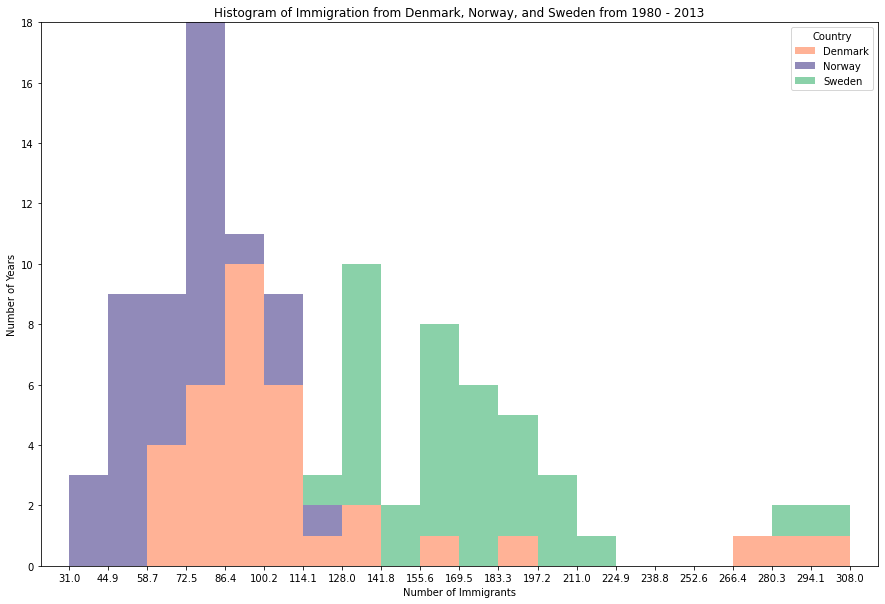

In [224]:
xmin = bin_ranges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_ranges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

df_dns.plot(kind='hist', figsize=(15,10), alpha=0.6, color=['coral', 'darkslateblue', 'mediumseagreen'],
            bins=20, xticks=bin_ranges,
           stacked=True, xlim=(xmin, xmax))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

In [209]:
xmin

21.0

In [214]:
bin_ranges

array([ 31.  ,  44.85,  58.7 ,  72.55,  86.4 , 100.25, 114.1 , 127.95,
       141.8 , 155.65, 169.5 , 183.35, 197.2 , 211.05, 224.9 , 238.75,
       252.6 , 266.45, 280.3 , 294.15, 308.  ])

In [211]:
count

array([ 3,  9,  9, 18, 11,  9,  3, 10,  2,  8,  6,  5,  3,  1,  0,  0,  0,
        1,  2,  2], dtype=int64)

In [225]:
#Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? 
#Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [228]:
df_gab=df_can.loc[['Greece','Albania','Bulgaria'],years].transpose()

In [229]:
df_gab.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


<AxesSubplot:ylabel='Frequency'>

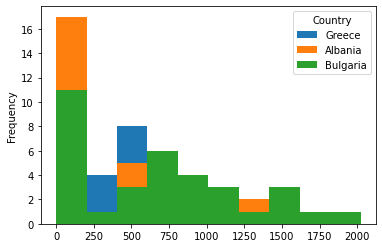

In [230]:
df_gab.plot(kind='hist',)

In [231]:
count, bins_sizes=np.histogram(df_gab,15)

In [232]:
count

array([37,  9,  4,  6, 13,  9,  5,  5,  3,  3,  2,  3,  1,  1,  1],
      dtype=int64)

In [233]:
bins_sizes

array([   0. ,  134.8,  269.6,  404.4,  539.2,  674. ,  808.8,  943.6,
       1078.4, 1213.2, 1348. , 1482.8, 1617.6, 1752.4, 1887.2, 2022. ])

In [ ]:
xminn

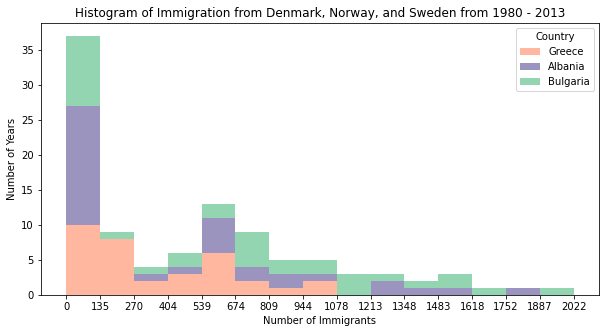

In [246]:
df_gab.plot(kind='hist',alpha=0.55,stacked=True,figsize=(10,5),bins=15,xticks=bins_sizes,
           color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

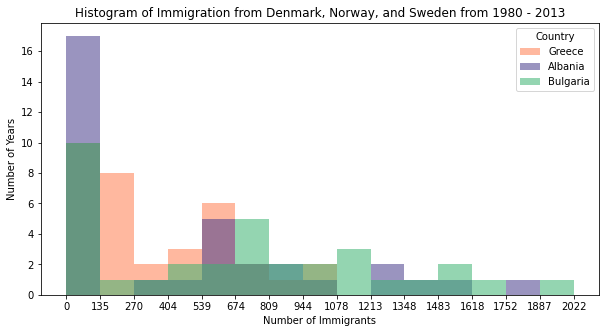

In [247]:
df_gab.plot(kind='hist',alpha=0.55,figsize=(10,5),bins=15,xticks=bins_sizes,
           color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

In [ ]:
##BAR CHARTS
#Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. 

In [254]:
df_ice=df_can.loc['Iceland', years]

In [257]:
df_ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

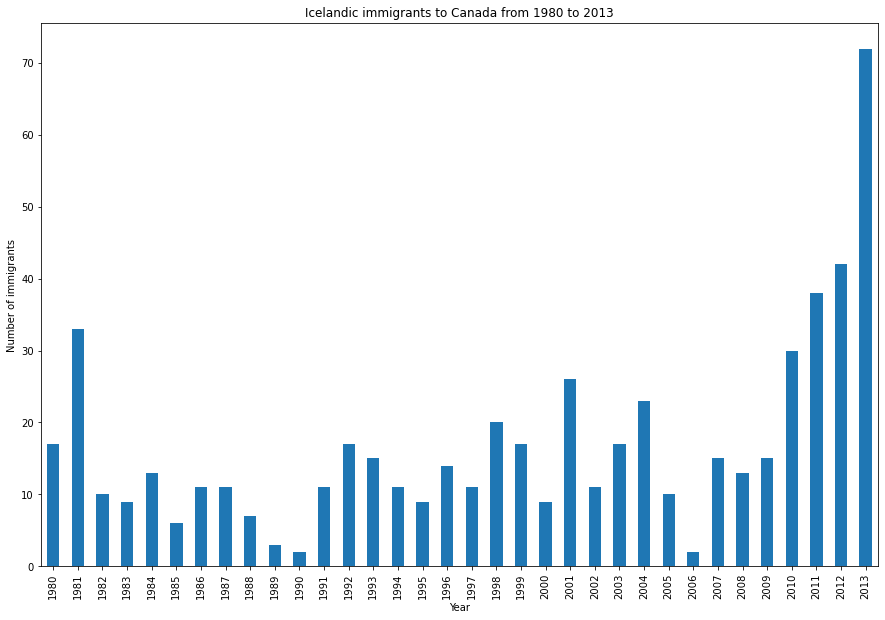

In [259]:
df_ice.plot(kind='bar', figsize=(15,10))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

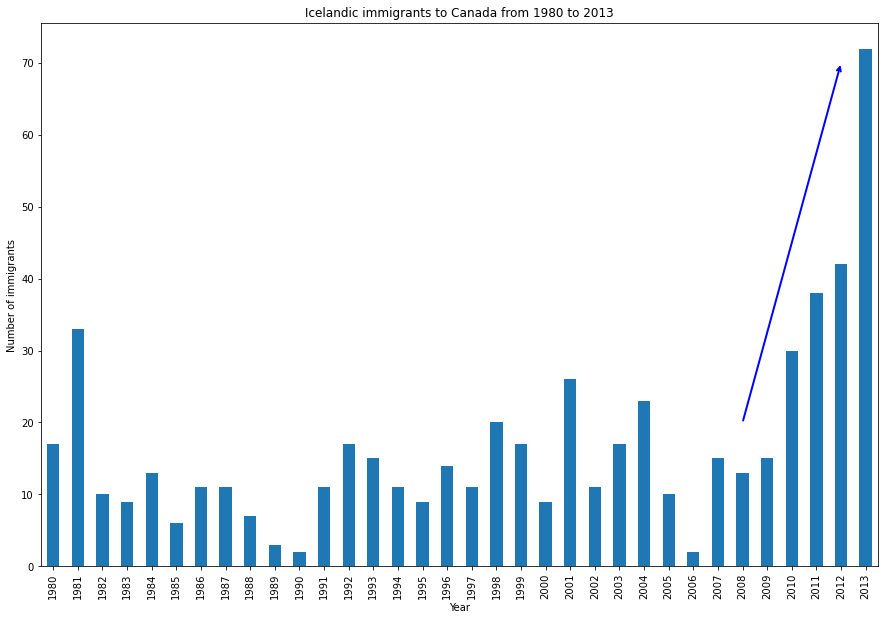

In [270]:
df_ice.plot(kind='bar', figsize=(15,10), rot=90)
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

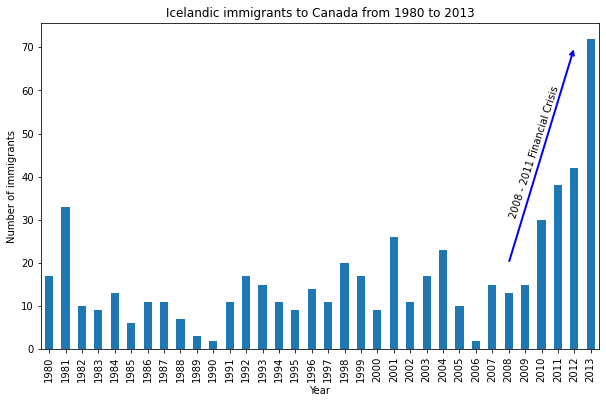

In [283]:
df_ice.plot(kind='bar', figsize=(10,6), rot=90)
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
plt.annotate('2008 - 2011 Financial Crisis',
            xy=(28,30),
            rotation=72,
            va='bottom',
            ha='left')
plt.show()

In [284]:
#Question: Using the scripting layter and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. 
#Label each country with the total immigrant count.

In [288]:
df_desc15=df_can.sort_values(['Total'],ascending=False, axis=0).head(15)

In [289]:
df_desc15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904.0
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600.0
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122.0
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923.0
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358.0
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581.0


In [293]:
df_desc15=df_desc15['Total']

In [294]:
df_desc15

Country
India                                                   691904.0
China                                                   659962.0
United Kingdom of Great Britain and Northern Ireland    551500.0
Philippines                                             511391.0
Pakistan                                                241600.0
United States of America                                241122.0
Iran (Islamic Republic of)                              175923.0
Sri Lanka                                               148358.0
Republic of Korea                                       142581.0
Poland                                                  139241.0
Lebanon                                                 115359.0
France                                                  109091.0
Jamaica                                                 106431.0
Viet Nam                                                 97146.0
Romania                                                  93585.0
Name: Total, dtyp

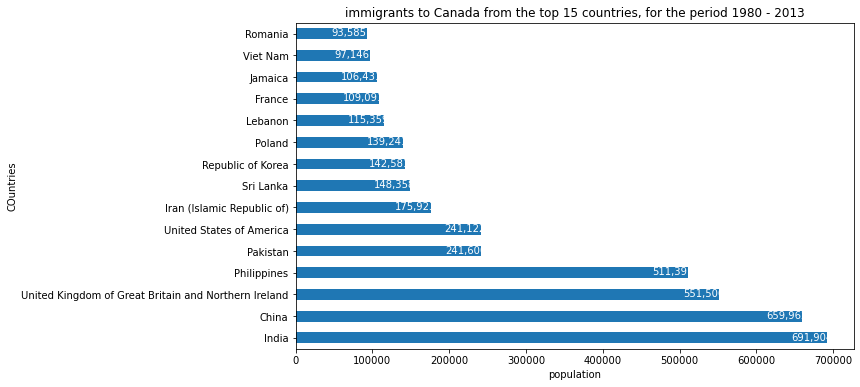

In [298]:
df_desc15.plot(kind='barh', figsize=(10,6))
plt.title('immigrants to Canada from the top 15 countries, for the period 1980 - 2013')
plt.xlabel('population')
plt.ylabel('COuntries')

for index, value in enumerate(df_desc15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()